# Keras Intensive Run

Instructions
1. Define the global variables;
2. Run the second snippet. It builds the network and saves the output to a folder displayed on the console.

In [37]:
# TEST VARIABLES
labelsGroup = [
    ["happy", "sad"],
]
iterationsGroup = [100]
hiddenLayersGroup = [
    [144],
]
batchSizeGroup = [64, 128]

In [28]:
# GLOBAL VARIABLES
labelsGroup = [
    ["angry", "fear", "happy", "neutral", "sad", "surprise"],
    ["happy", "angry", "neutral"],
    ["happy", "sad"],
    ["fear", "angry"],
]
iterationsGroup = [1000, 2500, 5000]
hiddenLayersGroup = [
    [144],
    [300,200,100,50],
]
batchSizeGroup = [64, 128]

In [33]:
def confusionMatrix(labels, pred, y):
    
    confusionTFPN = {}
    confusionLabels = {}
    
    # Foreach emotion
    for ie in range(len(labels)):
        # TRUE AND FALSE POSITIVES AND NEGATIVES (TFPN)
        
        # Get indexes where emotion was predicted
        ieIndexesPred = [i for i in range(pred.size) if pred[i]==ie]
        ieIndexesNotPred = [i for i in range(pred.size) if pred[i]!=ie]

        # Predicted, and Actual
        TP = sum(pred[:,np.newaxis][ieIndexesPred]==y[ieIndexesPred])
        # Predicted, but not actual
        FP = sum(pred[:,np.newaxis][ieIndexesPred]!=y[ieIndexesPred])
        # Not predicted, but actual
        FN = sum(y[ieIndexesNotPred]==ie)
        # Not predicted and not actual
        TN = sum(y[ieIndexesNotPred]!=ie)

        TP = TP[0] if TP else 0
        FP = FP[0] if FP else 0
        FN = FN[0] if FN else 0
        TN = TN[0] if TN else 0
        
        confusionTFPN[labels[ie]] = {
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN
        }
        
        # CONFUSION WITH OTHER labels (Confusion)
        # For emotion e
        # Count the number of predictions made for all classes
        # Foreach emotion, check how many times it has been predicted 
        
        # Get indexes where emotion is real
        ieIndexesY = [i for i in range(y.size) if y[i]==ie]
        
        # Foreach matching prediction, check what emotion was predicted
        confusionLabels[labels[ie]] = {
            e: sum(pred[:,np.newaxis][ieIndexesY]==labels.index(e))[0] for e in labels
        }
        
    return confusionTFPN, confusionLabels

def outputConfusionTables(labels, testExamplesNumber, confusionTFPN, confusionLabels, axs, axsLine, axsTitle):
     # TABLES
    rows = tuple(labels)
    
    # TABLES / TFPN
    # Output confusion matrix as plot table
    data = [
        [
            f"{vals['TP']} ({vals['TP']/testExamplesNumber*100:.2f}%)",
            f"{vals['TN']} ({vals['TN']/testExamplesNumber*100:.2f}%)",
            f"{vals['TP']+vals['TN']} ({(vals['TP']+vals['TN'])/testExamplesNumber*100:.2f}%)",
            f"{vals['FP']} ({vals['FP']/testExamplesNumber*100:.2f}%)",
            f"{vals['FN']} ({vals['FN']/testExamplesNumber*100:.2f}%)",
            f"{vals['FP']+vals['FN']} ({(vals['FP']+vals['FN'])/testExamplesNumber*100:.2f}%)",
            vals['FP']+vals['FN']+vals['TP']+vals['TN']
        ]
        for _, vals in confusionTFPN.items()
    ]
    columns = ['TP (%)', 'TN (%)', 'T (%)', 'FP (%)', 'FN (%)', 'F (%)', f"Total"]
    
    # Colorize cells depending on value
    cellColours=plt.cm.Blues([
        [
            vals['TP']/testExamplesNumber,
            vals['TN']/testExamplesNumber,
            0,
            vals['FP']/testExamplesNumber,
            vals['FN']/testExamplesNumber,
            0,
            0
        ]
        for _, vals in confusionTFPN.items()
    ])
        
    the_table = axs[axsLine].table(
      cellText=data,
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours
    )
    # the_table.scale(1.2, 1)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(20)
    axs[axsLine].axis('off')
    axs[axsLine].axis('tight')
    axs[axsLine].set_title(f"Confusion matrix {axsTitle}", fontsize=20, pad=0)    
    
    # TABLES / Confusion    
    # Output confusion matrix as plot table
    data = [[o for _,o in others.items()] for _,others in confusionLabels.items()]
    columns = rows
    
    # Colorize cells depending on value
    vals = [o for _,others in confusionLabels.items() for _,o in others.items()]
    normal = plt.Normalize(min(vals)-1, max(vals)+1)
    cellColours=plt.cm.Blues(normal(data))
        
    the_table = axs[axsLine+1].table(
      cellText=data,
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours
    )
    
    the_table.set_fontsize(20)
    # the_table.scale(1, 4)
    axs[axsLine+1].axis('off')
    axs[axsLine+1].axis('tight')
    axs[axsLine+1].set_title(f"True/Predicted {axsTitle}", fontsize=20)
    



LABELS happy, sad
Loaded 2000 traing examples with 2 labels, each with 2304 features (pixels).
Loaded 400 dev examples.
Loaded 400 test examples.


Building network for 4 iterations and batch size of 64 and 1 hidden layers: 144...

Epoch 1/4
32/32 [==============================] - 1s 11ms/step - loss: 0.7948 - accuracy: 0.4946 - val_loss: 0.8050 - val_accuracy: 0.5025
Epoch 2/4
32/32 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5779 - val_loss: 0.6898 - val_accuracy: 0.5475
Epoch 3/4
32/32 [==============================] - 0s 6ms/step - loss: 0.6628 - accuracy: 0.6068 - val_loss: 0.6364 - val_accuracy: 0.6625
Epoch 4/4
13/13 [==============================] - 0s 1ms/step - loss: 0.6584 - accuracy: 0.6225

Model trained and metrics saved to ./metrics/happy_sad/archive/4i_64b_1hl__144/!

Building network for 7 iterations and batch size of 128 and 1 hidden layers: 144...

Epoch 1/7
16/16 [==============================] - 1s 18ms/step - loss: 0.9789 - ac

1/1 [==============================] - 0s 108ms/step - loss: 0.6794 - accuracy: 0.5600 - val_loss: 0.6639 - val_accuracy: 0.6150
Epoch 17/100
1/1 [==============================] - 0s 104ms/step - loss: 0.6777 - accuracy: 0.5805 - val_loss: 0.6630 - val_accuracy: 0.5925
Epoch 18/100
1/1 [==============================] - 0s 104ms/step - loss: 0.6764 - accuracy: 0.5600 - val_loss: 0.6610 - val_accuracy: 0.6300
Epoch 19/100
1/1 [==============================] - 0s 109ms/step - loss: 0.6751 - accuracy: 0.5915 - val_loss: 0.6603 - val_accuracy: 0.6000
Epoch 20/100
1/1 [==============================] - 0s 121ms/step - loss: 0.6740 - accuracy: 0.5680 - val_loss: 0.6587 - val_accuracy: 0.6450
Epoch 21/100
1/1 [==============================] - 0s 113ms/step - loss: 0.6729 - accuracy: 0.5970 - val_loss: 0.6580 - val_accuracy: 0.6075
Epoch 22/100
1/1 [==============================] - 0s 76ms/step - loss: 0.6719 - accuracy: 0.5750 - val_loss: 0.6565 - val_accuracy: 0.6475
Epoch 23/100
1/1 [==

Epoch 74/100
1/1 [==============================] - 0s 98ms/step - loss: 0.6577 - accuracy: 0.5965 - val_loss: 0.6418 - val_accuracy: 0.6400
Epoch 75/100
1/1 [==============================] - 0s 93ms/step - loss: 0.6562 - accuracy: 0.6105 - val_loss: 0.6445 - val_accuracy: 0.5925
Epoch 76/100
1/1 [==============================] - 0s 80ms/step - loss: 0.6574 - accuracy: 0.5980 - val_loss: 0.6414 - val_accuracy: 0.6400
Epoch 77/100
1/1 [==============================] - 0s 81ms/step - loss: 0.6558 - accuracy: 0.6115 - val_loss: 0.6442 - val_accuracy: 0.5925
Epoch 78/100
1/1 [==============================] - 0s 88ms/step - loss: 0.6571 - accuracy: 0.5990 - val_loss: 0.6411 - val_accuracy: 0.6425
Epoch 79/100
1/1 [==============================] - 0s 85ms/step - loss: 0.6554 - accuracy: 0.6130 - val_loss: 0.6440 - val_accuracy: 0.5900
Epoch 80/100
1/1 [==============================] - 0s 82ms/step - loss: 0.6569 - accuracy: 0.5990 - val_loss: 0.6408 - val_accuracy: 0.6425
Epoch 81/100


1/1 [==============================] - 0s 90ms/step - loss: 0.6791 - accuracy: 0.5795 - val_loss: 0.6727 - val_accuracy: 0.6125
Epoch 21/100
1/1 [==============================] - 0s 115ms/step - loss: 0.6779 - accuracy: 0.5785 - val_loss: 0.6713 - val_accuracy: 0.6000
Epoch 22/100
1/1 [==============================] - 0s 110ms/step - loss: 0.6767 - accuracy: 0.5860 - val_loss: 0.6697 - val_accuracy: 0.6225
Epoch 23/100
1/1 [==============================] - 0s 63ms/step - loss: 0.6756 - accuracy: 0.5810 - val_loss: 0.6684 - val_accuracy: 0.6000
Epoch 24/100
1/1 [==============================] - 0s 66ms/step - loss: 0.6745 - accuracy: 0.5885 - val_loss: 0.6666 - val_accuracy: 0.6250
Epoch 25/100
1/1 [==============================] - 0s 62ms/step - loss: 0.6734 - accuracy: 0.5920 - val_loss: 0.6651 - val_accuracy: 0.6175
Epoch 26/100
1/1 [==============================] - 0s 67ms/step - loss: 0.6724 - accuracy: 0.5955 - val_loss: 0.6638 - val_accuracy: 0.6300
Epoch 27/100
1/1 [======

1/1 [==============================] - 0s 78ms/step - loss: 0.6644 - accuracy: 0.5790 - val_loss: 0.6478 - val_accuracy: 0.6100
Epoch 79/100
1/1 [==============================] - 0s 71ms/step - loss: 0.6630 - accuracy: 0.5870 - val_loss: 0.6488 - val_accuracy: 0.5925
Epoch 80/100
1/1 [==============================] - 0s 75ms/step - loss: 0.6640 - accuracy: 0.5790 - val_loss: 0.6472 - val_accuracy: 0.6100
Epoch 81/100
1/1 [==============================] - 0s 70ms/step - loss: 0.6625 - accuracy: 0.5875 - val_loss: 0.6481 - val_accuracy: 0.5925
Epoch 82/100
1/1 [==============================] - 0s 72ms/step - loss: 0.6634 - accuracy: 0.5805 - val_loss: 0.6465 - val_accuracy: 0.6050
Epoch 83/100
1/1 [==============================] - 0s 71ms/step - loss: 0.6619 - accuracy: 0.5885 - val_loss: 0.6474 - val_accuracy: 0.5950
Epoch 84/100
1/1 [==============================] - 0s 78ms/step - loss: 0.6627 - accuracy: 0.5810 - val_loss: 0.6458 - val_accuracy: 0.6075
Epoch 85/100
1/1 [========

1/1 [==============================] - 0s 101ms/step - loss: 0.6820 - accuracy: 0.5520 - val_loss: 0.6810 - val_accuracy: 0.5700
Epoch 25/100
1/1 [==============================] - 0s 113ms/step - loss: 0.6803 - accuracy: 0.5735 - val_loss: 0.6807 - val_accuracy: 0.5425
Epoch 26/100
1/1 [==============================] - 0s 104ms/step - loss: 0.6789 - accuracy: 0.5550 - val_loss: 0.6778 - val_accuracy: 0.5675
Epoch 27/100
1/1 [==============================] - 0s 130ms/step - loss: 0.6776 - accuracy: 0.5810 - val_loss: 0.6778 - val_accuracy: 0.5525
Epoch 28/100
1/1 [==============================] - 0s 128ms/step - loss: 0.6766 - accuracy: 0.5620 - val_loss: 0.6752 - val_accuracy: 0.5700
Epoch 29/100
1/1 [==============================] - 0s 113ms/step - loss: 0.6755 - accuracy: 0.5835 - val_loss: 0.6753 - val_accuracy: 0.5550
Epoch 30/100
1/1 [==============================] - 0s 102ms/step - loss: 0.6745 - accuracy: 0.5680 - val_loss: 0.6729 - val_accuracy: 0.5800
Epoch 31/100
1/1 [=

Epoch 82/100
1/1 [==============================] - 0s 95ms/step - loss: 0.6550 - accuracy: 0.6020 - val_loss: 0.6491 - val_accuracy: 0.6350
Epoch 83/100
1/1 [==============================] - 0s 93ms/step - loss: 0.6548 - accuracy: 0.6205 - val_loss: 0.6521 - val_accuracy: 0.6000
Epoch 84/100
1/1 [==============================] - 0s 76ms/step - loss: 0.6556 - accuracy: 0.6015 - val_loss: 0.6494 - val_accuracy: 0.6250
Epoch 85/100
1/1 [==============================] - 0s 80ms/step - loss: 0.6553 - accuracy: 0.6200 - val_loss: 0.6528 - val_accuracy: 0.6000
Epoch 86/100
1/1 [==============================] - 0s 74ms/step - loss: 0.6562 - accuracy: 0.5990 - val_loss: 0.6498 - val_accuracy: 0.6250
Epoch 87/100
1/1 [==============================] - 0s 87ms/step - loss: 0.6559 - accuracy: 0.6160 - val_loss: 0.6534 - val_accuracy: 0.5925
Epoch 88/100
1/1 [==============================] - 0s 72ms/step - loss: 0.6568 - accuracy: 0.5995 - val_loss: 0.6501 - val_accuracy: 0.6200
Epoch 89/100


1/1 [==============================] - 0s 94ms/step - loss: 0.6804 - accuracy: 0.5690 - val_loss: 0.6749 - val_accuracy: 0.5650
Epoch 29/100
1/1 [==============================] - 0s 107ms/step - loss: 0.6793 - accuracy: 0.5665 - val_loss: 0.6737 - val_accuracy: 0.5725
Epoch 30/100
1/1 [==============================] - 0s 114ms/step - loss: 0.6783 - accuracy: 0.5745 - val_loss: 0.6725 - val_accuracy: 0.5725
Epoch 31/100
1/1 [==============================] - 0s 124ms/step - loss: 0.6772 - accuracy: 0.5710 - val_loss: 0.6715 - val_accuracy: 0.5625
Epoch 32/100
1/1 [==============================] - 0s 133ms/step - loss: 0.6763 - accuracy: 0.5785 - val_loss: 0.6705 - val_accuracy: 0.5700
Epoch 33/100
1/1 [==============================] - 0s 139ms/step - loss: 0.6753 - accuracy: 0.5775 - val_loss: 0.6696 - val_accuracy: 0.5600
Epoch 34/100
1/1 [==============================] - 0s 141ms/step - loss: 0.6744 - accuracy: 0.5805 - val_loss: 0.6686 - val_accuracy: 0.5625
Epoch 35/100
1/1 [==

1/1 [==============================] - 0s 95ms/step - loss: 0.6598 - accuracy: 0.5950 - val_loss: 0.6489 - val_accuracy: 0.6800
Epoch 87/100
1/1 [==============================] - 0s 84ms/step - loss: 0.6575 - accuracy: 0.6125 - val_loss: 0.6518 - val_accuracy: 0.5950
Epoch 88/100
1/1 [==============================] - 0s 109ms/step - loss: 0.6570 - accuracy: 0.5975 - val_loss: 0.6469 - val_accuracy: 0.6850
Epoch 89/100
1/1 [==============================] - 0s 99ms/step - loss: 0.6553 - accuracy: 0.6180 - val_loss: 0.6498 - val_accuracy: 0.5925
Epoch 90/100
1/1 [==============================] - 0s 99ms/step - loss: 0.6550 - accuracy: 0.6035 - val_loss: 0.6455 - val_accuracy: 0.6925
Epoch 91/100
1/1 [==============================] - 0s 108ms/step - loss: 0.6536 - accuracy: 0.6280 - val_loss: 0.6482 - val_accuracy: 0.5925
Epoch 92/100
1/1 [==============================] - 0s 112ms/step - loss: 0.6534 - accuracy: 0.6095 - val_loss: 0.6443 - val_accuracy: 0.6950
Epoch 93/100
1/1 [=====

1/1 [==============================] - 0s 73ms/step - loss: 0.6641 - accuracy: 0.6030 - val_loss: 0.6539 - val_accuracy: 0.6375
Epoch 33/100
1/1 [==============================] - 0s 71ms/step - loss: 0.6635 - accuracy: 0.6105 - val_loss: 0.6538 - val_accuracy: 0.6375
Epoch 34/100
1/1 [==============================] - 0s 80ms/step - loss: 0.6629 - accuracy: 0.6045 - val_loss: 0.6530 - val_accuracy: 0.6375
Epoch 35/100
1/1 [==============================] - 0s 105ms/step - loss: 0.6624 - accuracy: 0.6115 - val_loss: 0.6528 - val_accuracy: 0.6400
Epoch 36/100
1/1 [==============================] - 0s 103ms/step - loss: 0.6618 - accuracy: 0.6070 - val_loss: 0.6520 - val_accuracy: 0.6375
Epoch 37/100
1/1 [==============================] - 0s 103ms/step - loss: 0.6613 - accuracy: 0.6160 - val_loss: 0.6519 - val_accuracy: 0.6350
Epoch 38/100
1/1 [==============================] - 0s 129ms/step - loss: 0.6608 - accuracy: 0.6040 - val_loss: 0.6511 - val_accuracy: 0.6300
Epoch 39/100
1/1 [====

Epoch 90/100
1/1 [==============================] - 0s 86ms/step - loss: 0.6512 - accuracy: 0.6040 - val_loss: 0.6400 - val_accuracy: 0.6375
Epoch 91/100
1/1 [==============================] - 0s 85ms/step - loss: 0.6510 - accuracy: 0.6305 - val_loss: 0.6424 - val_accuracy: 0.6000
Epoch 92/100
1/1 [==============================] - 0s 95ms/step - loss: 0.6518 - accuracy: 0.6045 - val_loss: 0.6405 - val_accuracy: 0.6325
Epoch 93/100
1/1 [==============================] - 0s 88ms/step - loss: 0.6516 - accuracy: 0.6265 - val_loss: 0.6430 - val_accuracy: 0.6000
Epoch 94/100
1/1 [==============================] - 0s 73ms/step - loss: 0.6523 - accuracy: 0.6060 - val_loss: 0.6407 - val_accuracy: 0.6350
Epoch 95/100
1/1 [==============================] - 0s 76ms/step - loss: 0.6518 - accuracy: 0.6260 - val_loss: 0.6430 - val_accuracy: 0.6000
Epoch 96/100
1/1 [==============================] - 0s 82ms/step - loss: 0.6523 - accuracy: 0.6045 - val_loss: 0.6404 - val_accuracy: 0.6350
Epoch 97/100


1/1 [==============================] - 0s 86ms/step - loss: 0.6704 - accuracy: 0.5980 - val_loss: 0.6572 - val_accuracy: 0.6100
Epoch 37/100
1/1 [==============================] - 0s 109ms/step - loss: 0.6698 - accuracy: 0.6015 - val_loss: 0.6565 - val_accuracy: 0.6100
Epoch 38/100
1/1 [==============================] - 0s 84ms/step - loss: 0.6691 - accuracy: 0.6010 - val_loss: 0.6557 - val_accuracy: 0.6125
Epoch 39/100
1/1 [==============================] - 0s 88ms/step - loss: 0.6684 - accuracy: 0.6055 - val_loss: 0.6548 - val_accuracy: 0.6125
Epoch 40/100
1/1 [==============================] - 0s 85ms/step - loss: 0.6677 - accuracy: 0.6050 - val_loss: 0.6539 - val_accuracy: 0.6175
Epoch 41/100
1/1 [==============================] - 0s 88ms/step - loss: 0.6670 - accuracy: 0.6115 - val_loss: 0.6531 - val_accuracy: 0.6125
Epoch 42/100
1/1 [==============================] - 0s 86ms/step - loss: 0.6664 - accuracy: 0.6125 - val_loss: 0.6523 - val_accuracy: 0.6125
Epoch 43/100
1/1 [=======

1/1 [==============================] - 0s 87ms/step - loss: 0.6441 - accuracy: 0.6455 - val_loss: 0.6272 - val_accuracy: 0.6700
Epoch 95/100
1/1 [==============================] - 0s 95ms/step - loss: 0.6438 - accuracy: 0.6585 - val_loss: 0.6270 - val_accuracy: 0.6600
Epoch 96/100
1/1 [==============================] - 0s 69ms/step - loss: 0.6435 - accuracy: 0.6460 - val_loss: 0.6266 - val_accuracy: 0.6625
Epoch 97/100
1/1 [==============================] - 0s 73ms/step - loss: 0.6433 - accuracy: 0.6620 - val_loss: 0.6265 - val_accuracy: 0.6575
Epoch 98/100
1/1 [==============================] - 0s 96ms/step - loss: 0.6430 - accuracy: 0.6470 - val_loss: 0.6260 - val_accuracy: 0.6675
Epoch 99/100
1/1 [==============================] - 0s 64ms/step - loss: 0.6427 - accuracy: 0.6625 - val_loss: 0.6260 - val_accuracy: 0.6550
Epoch 100/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6475

Model trained and metrics saved to ./metrics/happy_sad/archive/10

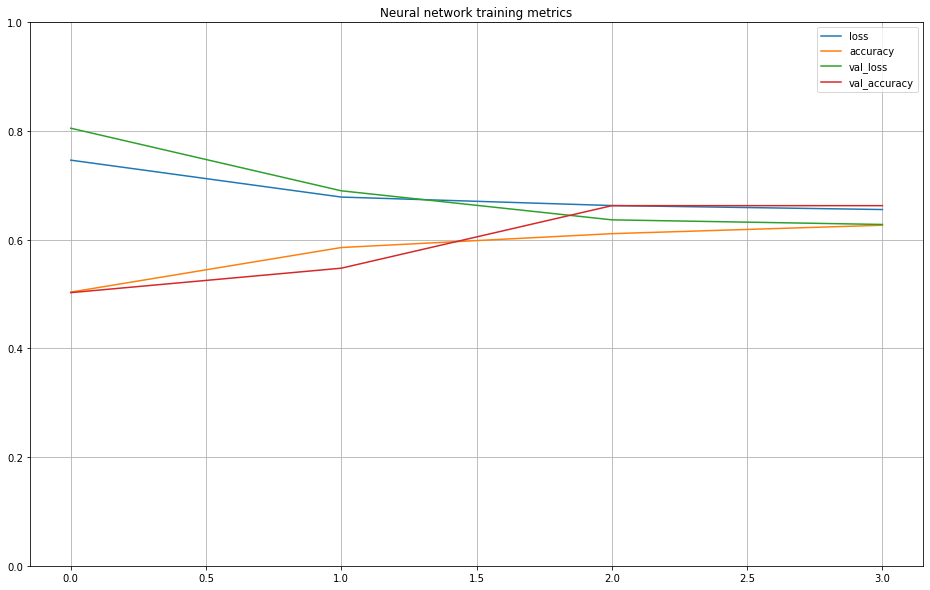

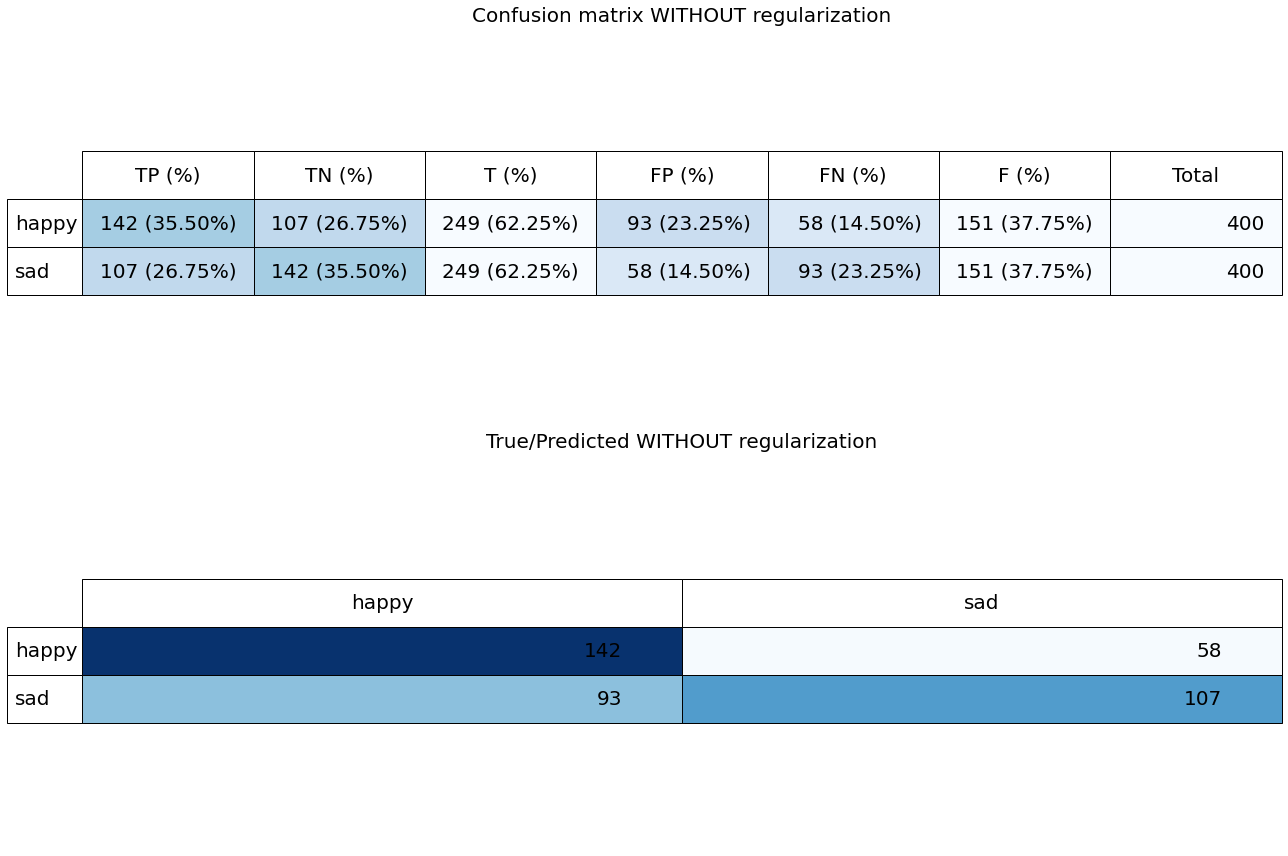

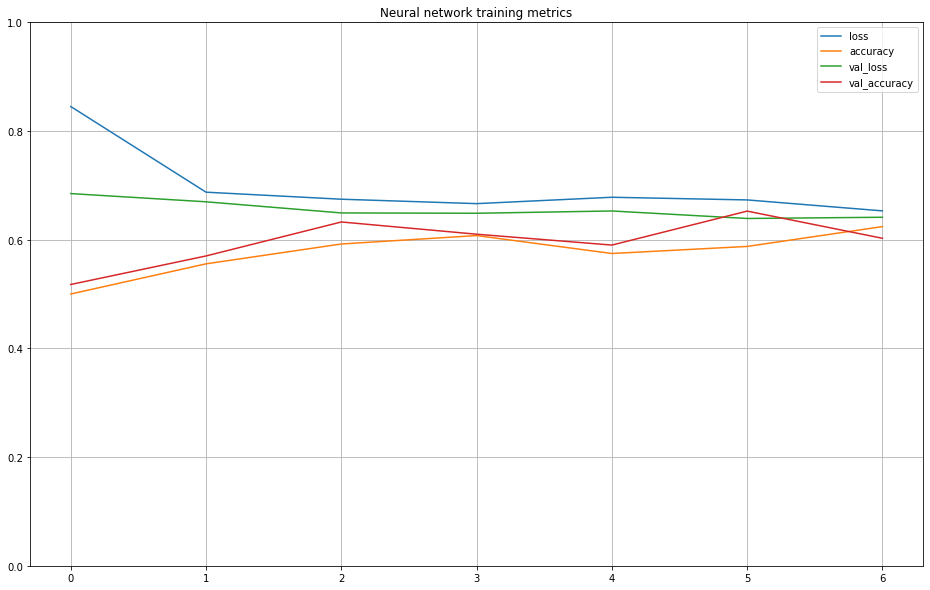

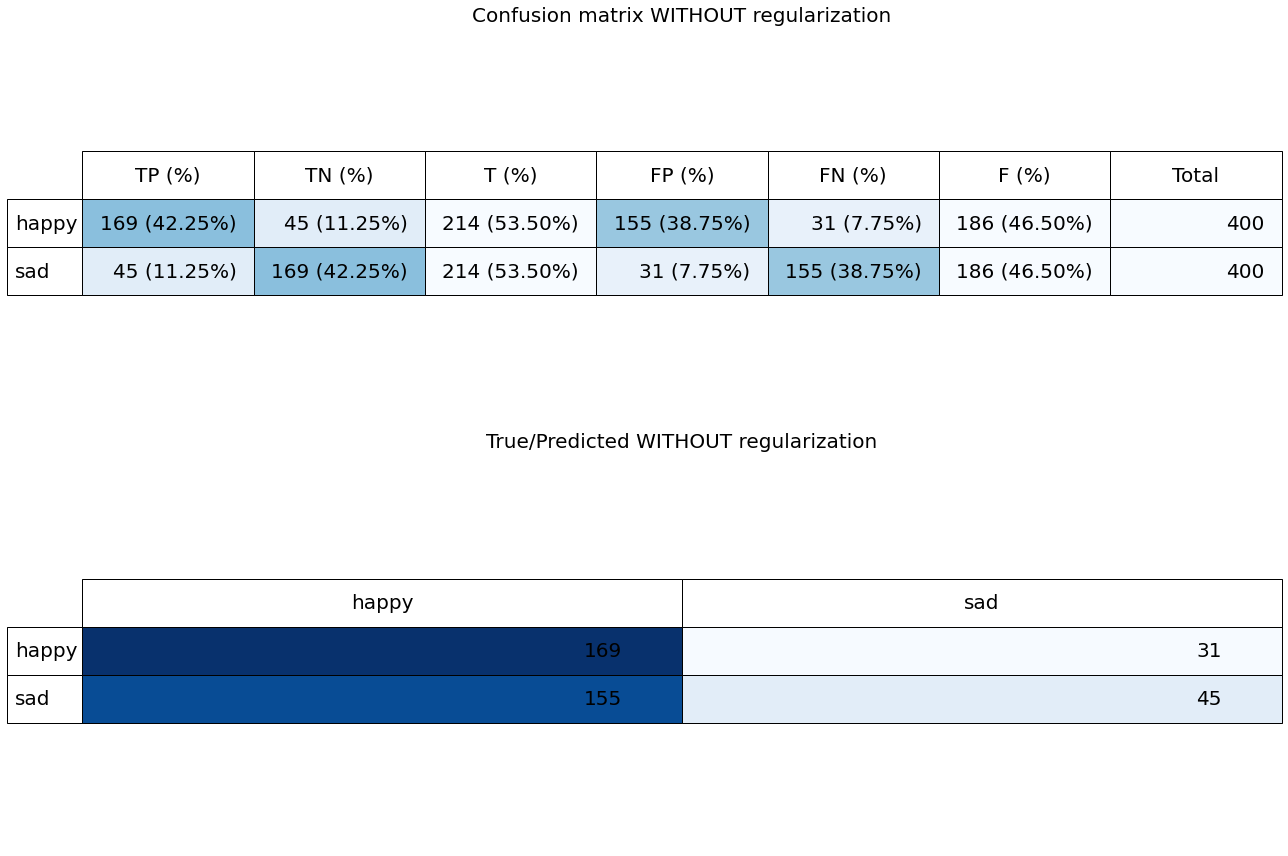

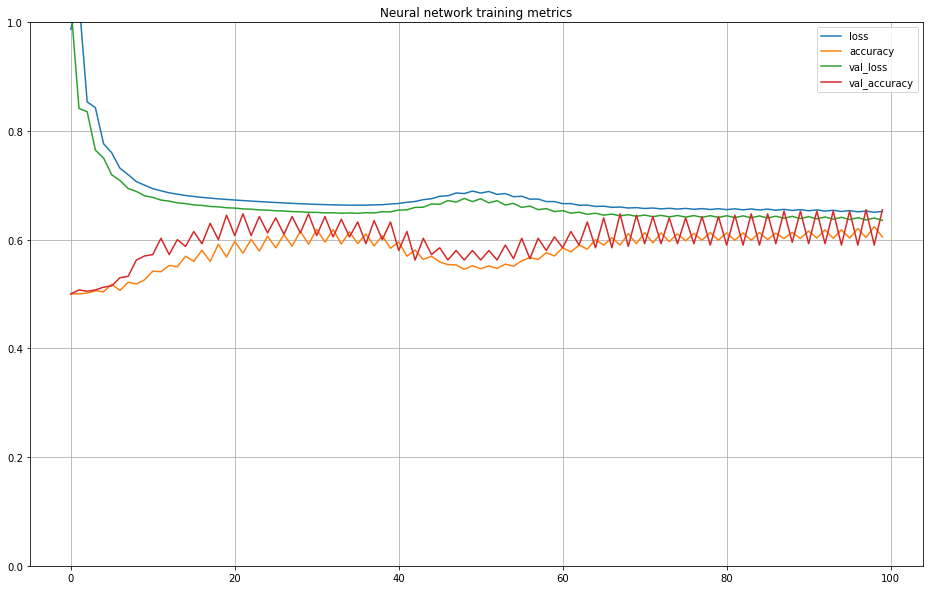

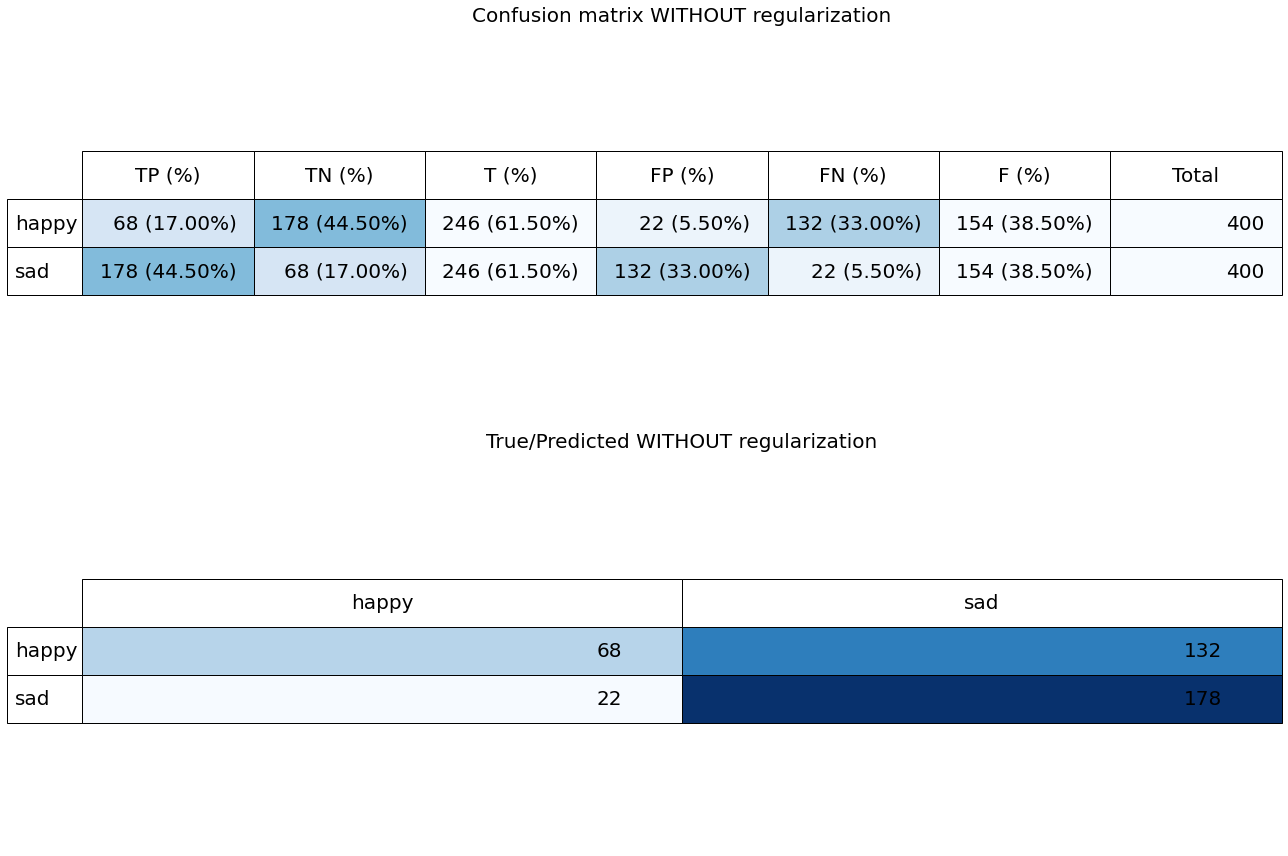

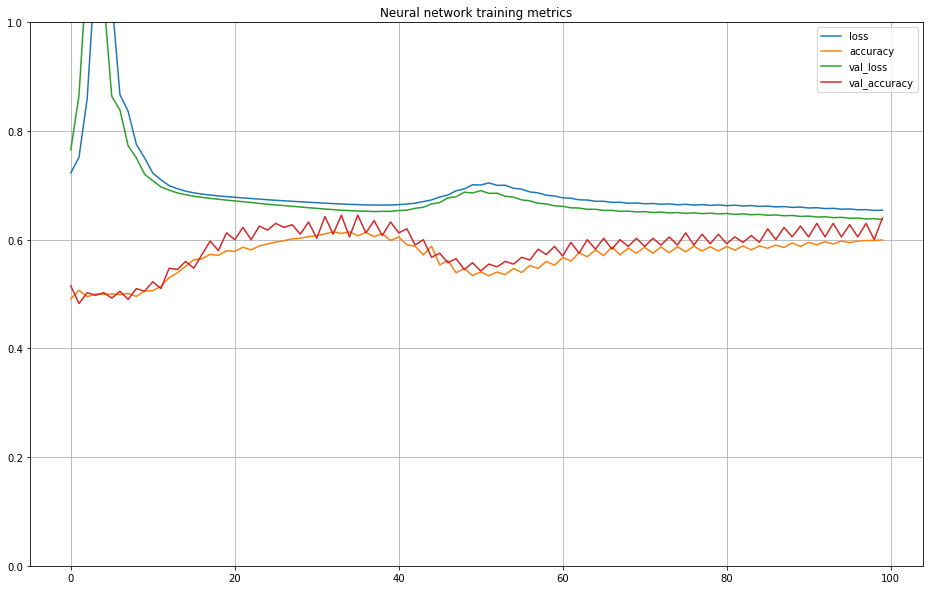

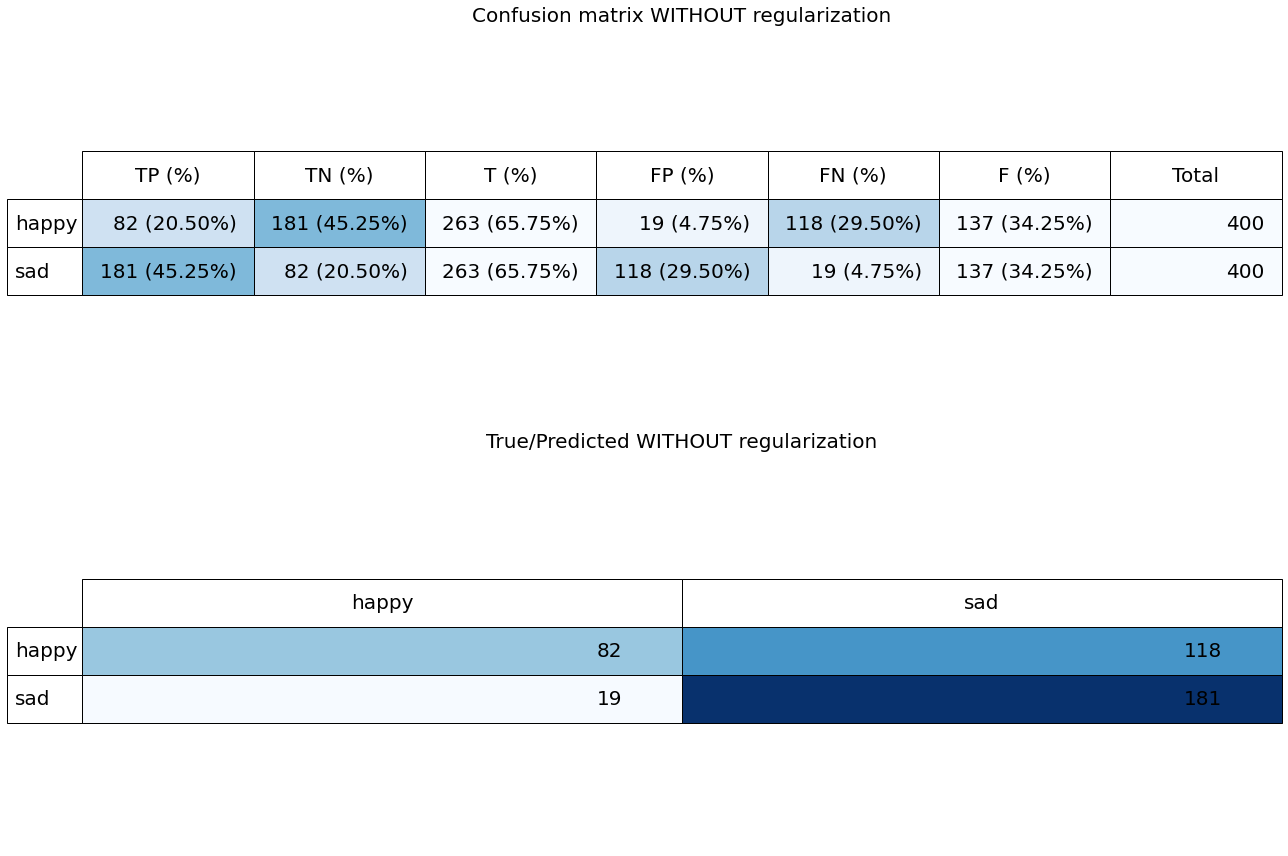

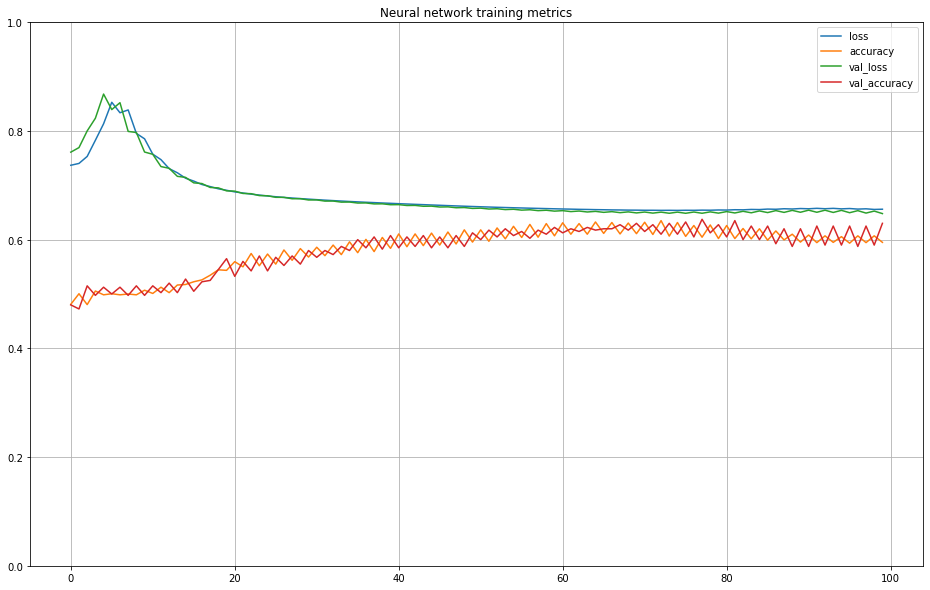

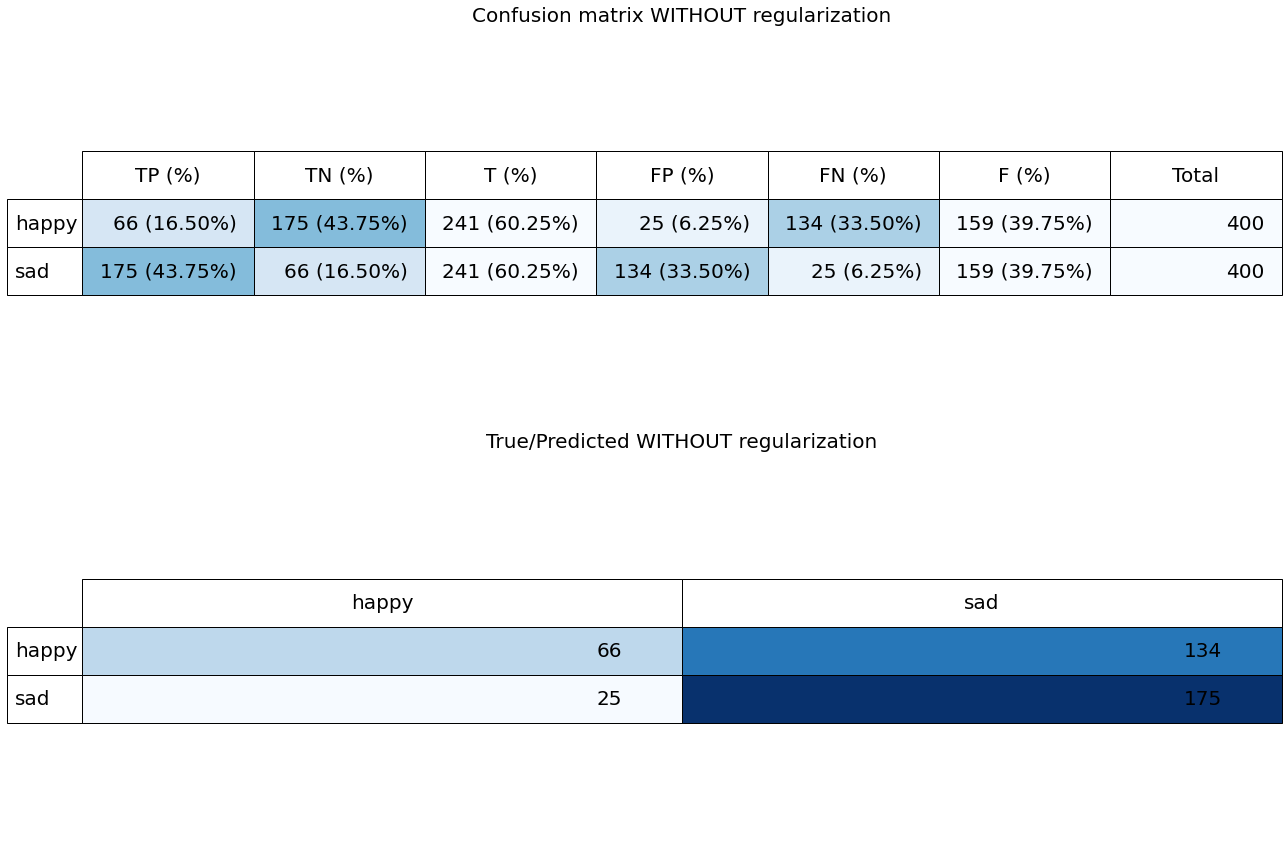

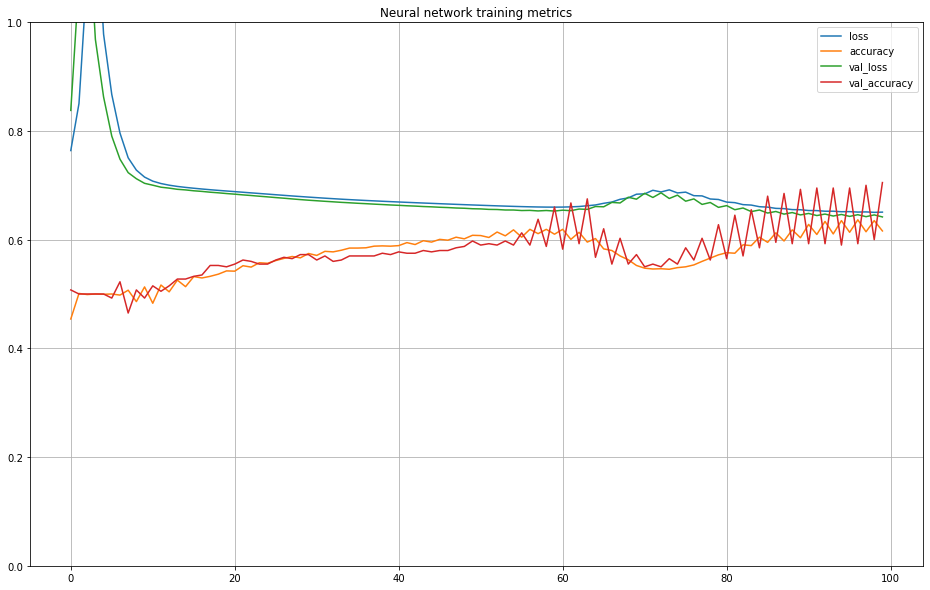

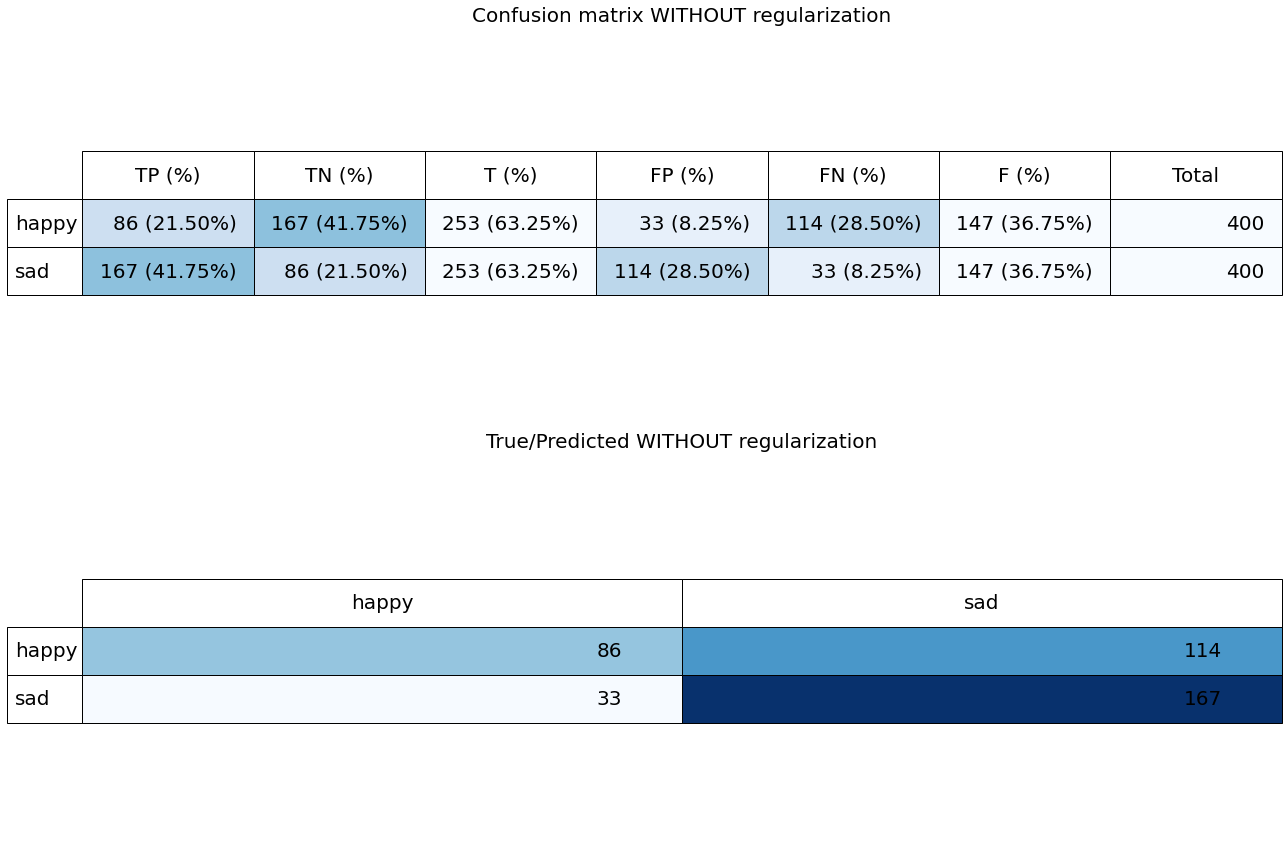

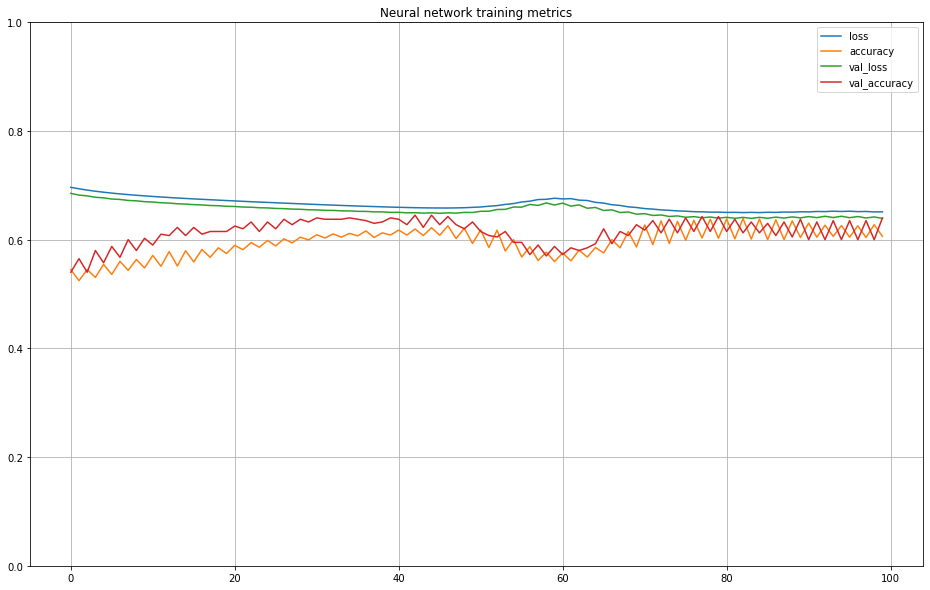

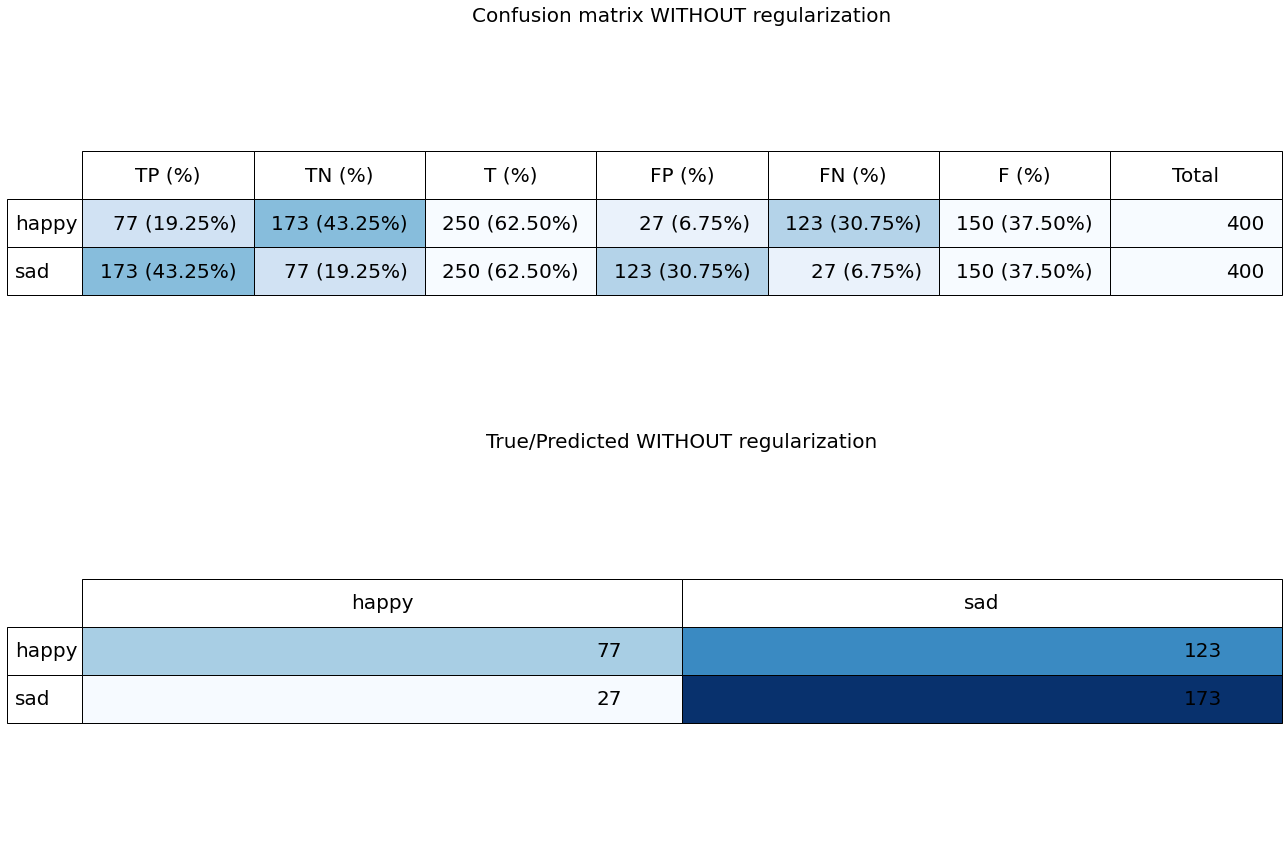

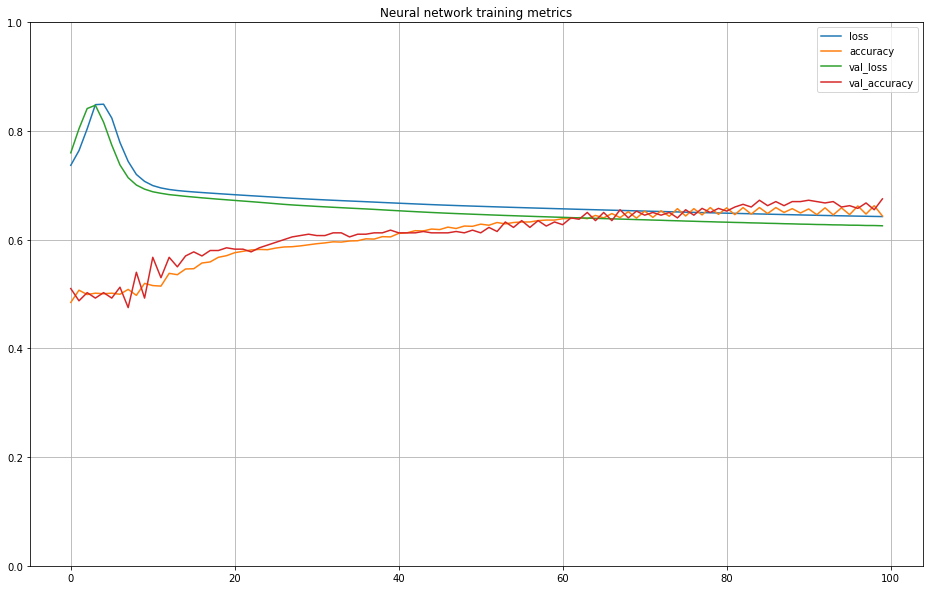

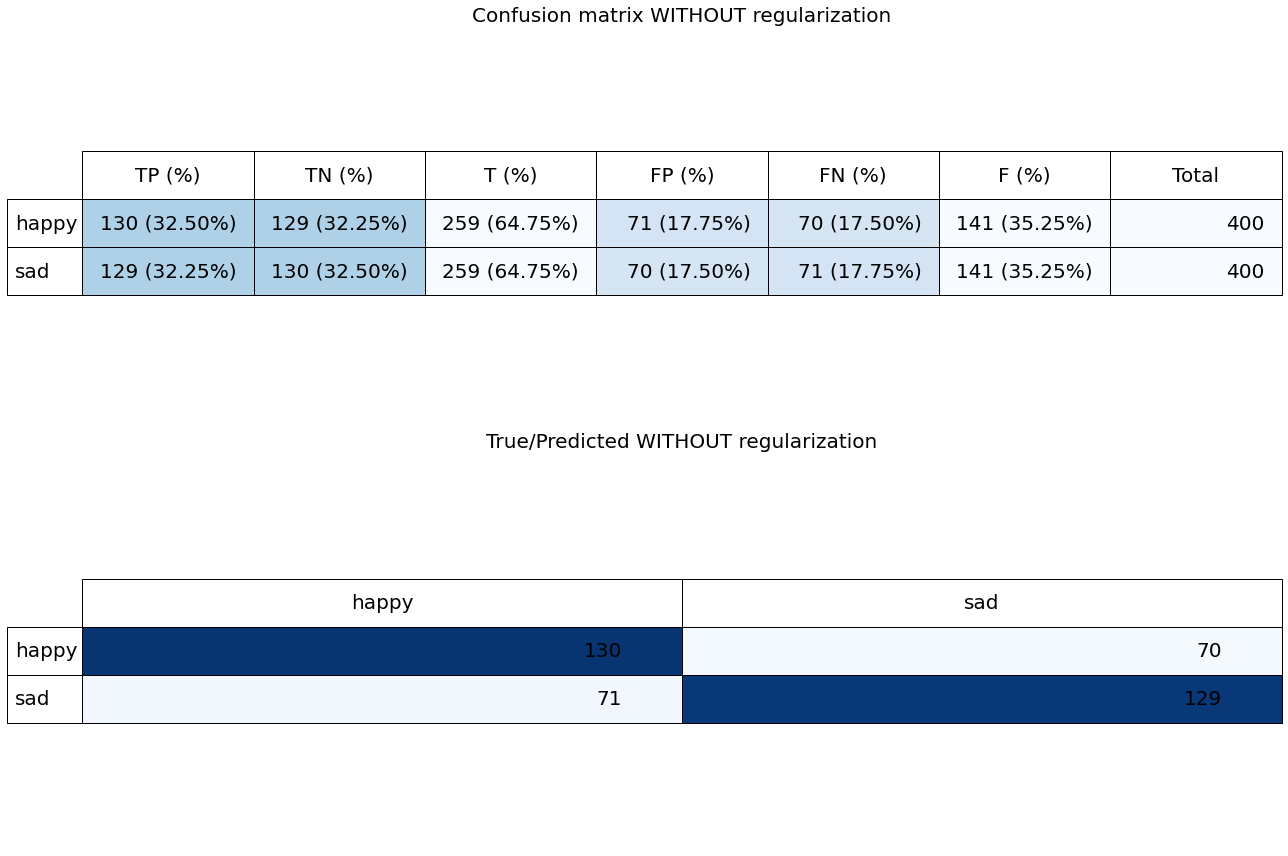

In [43]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
#to load matlab mat files
from scipy.io import loadmat
# for neural network
import tensorflow as tf
from tensorflow import keras
# for saving metrics
import os 
import json

if not os.path.exists('./metrics'):
        os.makedirs('./metrics')

# FOR EACH LABEL GROUP
for labelNames in labelsGroup:
    # LOAD FILES
    print("\n\nLABELS", ', '.join(labelNames))

    # Load Training data
    mat=loadmat(f"../datasets/train/{'_'.join(labelNames)}.mat")
    # mat is a dict with key "X" for x-values, and key "y" for y values
    X, y = mat["X"], mat["y"]

    # Load Dev Data
    matDev=loadmat(f"../datasets/dev/{'_'.join(labelNames)}.mat")
    X_valid, y_valid = matDev["X"], matDev["y"]

    # Load Test Data
    matTest=loadmat(f"../datasets/test/{'_'.join(labelNames)}.mat")
    X_test, y_test = matTest["X"], matTest["y"]
    
    # NUMBERS
    m = X.shape[0] # number of training examples
    labels = np.max(y)+1 # number of labels
    features = X.shape[1] # number of features per example

    print(f"Loaded {m} traing examples with {labels} labels, each with {features} features (pixels).")
    print(f"Loaded {X_valid.shape[0]} dev examples.")
    print(f"Loaded {X_test.shape[0]} test examples.")
    
    print()
    
    # Create batch size group for label with batch=#examples for batch gradient descent
    batchSizeGroupLabel = batchSizeGroup
    batchSizeGroupLabel.append(m)
    
    # Create folder for metrics
    labelFolder = f"./metrics/{'_'.join(labelNames)}"
    if not os.path.exists(labelFolder):
        os.makedirs(labelFolder)
    if not os.path.exists(f"{labelFolder}/history"):
        os.makedirs(f"{labelFolder}/history")
    if not os.path.exists(f"{labelFolder}/predict"):
        os.makedirs(f"{labelFolder}/predict")
    if not os.path.exists(f"{labelFolder}/archive"):
        os.makedirs(f"{labelFolder}/archive")
    
    
    # FOR EACH HIDDEN LAYER GROUP
    for hiddenLayers in hiddenLayersGroup:
        # WITH AND WITHOUT BATCHES
        for batch in batchSizeGroupLabel:
            # FOR EACH ITERATION
            for iterations in iterationsGroup:
                
                # Update iterations for batch size (so that final iterations epoch*batchNumber remains aproximate)
                iterations = math.ceil(iterations/(m/batch))

                # Create folder for metrics
                hiddenLayersText = '_'.join(hiddenLayers) if len(hiddenLayers)>1 else hiddenLayers[0]
                combinationName = f"{iterations}i_{batch}b_{len(hiddenLayers)}hl__{hiddenLayersText}"
                folder = f"{labelFolder}/archive/{combinationName}/"
                if not os.path.exists(folder):
                    os.makedirs(folder)

                print(f"\nBuilding network for {iterations} iterations and batch size of {batch} and {len(hiddenLayers)} hidden layers: {hiddenLayersText}...\n")

                # BUILD NETWORK
                # Create model
                modelSeq = []
                # Flattens each image (48x48) to 1x2304
                modelSeq.append(keras.layers.Flatten(input_shape = [48, 48]))
                # Hidden layers with relu activation function
                for h in hiddenLayers:
                    modelSeq.append(keras.layers.Dense(h, activation = "relu" ))
                # Output layer with softmax activation function
                modelSeq.append(keras.layers.Dense(labels, activation = "softmax" ))

                model = keras.models.Sequential(modelSeq)

                # Compile model
                model.compile(
                    # Using sparse categorical crossentropy loss function
                    loss = "sparse_categorical_crossentropy",
                    # Using stochastic gradient descent as gradient descent
                    optimizer = "sgd",
                    # In addition to cost, we want accuracy to help understanding how the model is working 
                    metrics = ["accuracy"]
                )

                # Train the network
                history = model.fit(
                    X,
                    y,
                    epochs = iterations,
                    batch_size = batch,
                    validation_data = (X_valid, y_valid)
                )

                # METRICS (SAVE TO FILE)

                # Model training history
                with open(f"{folder}/history.json", "w") as f:
                    json.dump(history.history, f)

                # Test model evaluation
                with open(f"{folder}/evaluation.json", "w") as f:
                    json.dump(model.evaluate(X_test, y_test, return_dict=True), f)

                # Prediction for test data
                with open(f"{folder}/predict.json", "w") as f:
                    json.dump(model.predict(X_test).tolist(), f)

                print(f"\nModel trained and metrics saved to {folder}!")

                # GENERATE GRAPHS AND SAVE TO FILE

                # Model training history
                pd.DataFrame(history.history).plot(figsize = (16, 10))
                plt.grid(True)
                plt.gca().set_ylim(0, 1)
                plt.title("Neural network training metrics")
                plt.savefig(f"{labelFolder}/history/{combinationName}.png")

                # Prediction for test data
                predict = model.predict(X_test)
                y_pred = np.array([np.argmax(p) for p in predict])
                confusionTFPN, confusionLabels = confusionMatrix(labelNames, y_pred, y_test)
                fig, axs = plt.subplots(2,1)
                outputConfusionTables(labelNames, y_test.size, confusionTFPN, confusionLabels, axs, 0, "WITHOUT regularization")
                fig.set_size_inches(18,6*len(labelNames))
                fig.subplots_adjust(left=0.2, top=20)
                fig.tight_layout()
                fig.savefig(f"{labelFolder}/predict/{combinationName}.png")